# WELCOME! 

![title](spotify.png)

# Importing the relevant packages

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

# Loading the Track Feats dataset

In [2]:
tf= pd.read_csv("C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\TECHNOCOLABS_INTERNSHIP\\track_feats.csv")
tf.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,3.866097,0.441176,-0.403765,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,...,0.571429,0.655369,0.834594,-0.653568,-0.483168,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,...,0.571429,0.387131,0.920349,0.335177,-2.631787,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,-1.629474,0.573529,-0.356946,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132837,0.946820,-0.623612


In [3]:
tf.shape

(316702, 30)

# Checking the correlation of Track Feat Dataset

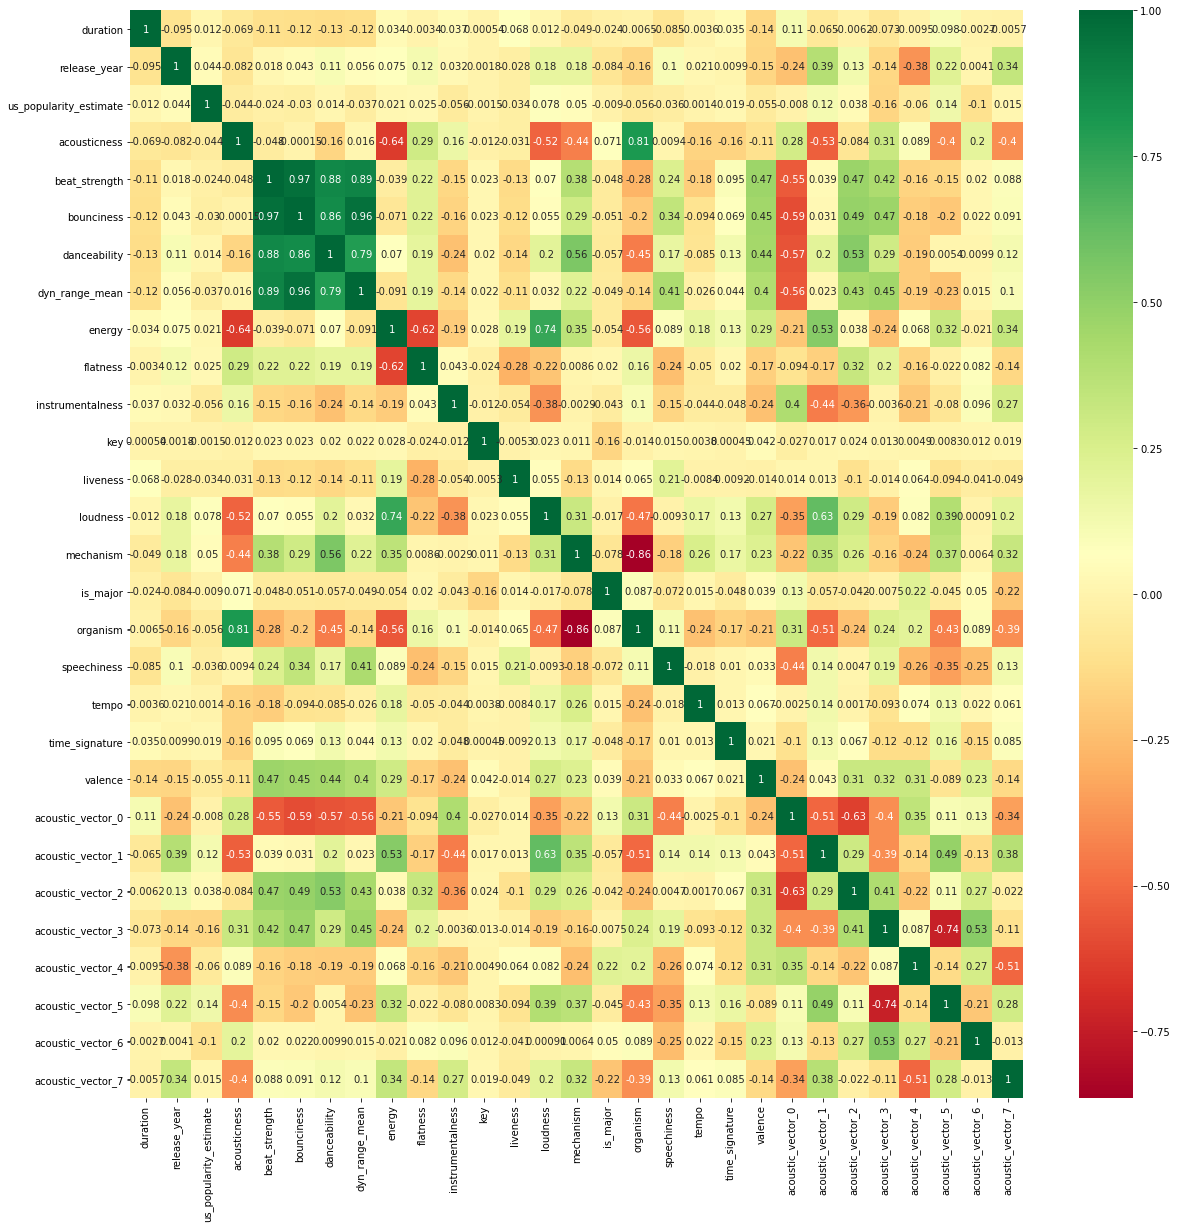

In [4]:
tf.corr()

plt.figure(figsize=(20,20))
sns.heatmap(tf.corr(), fmt= '.2g',annot=True, cmap="RdYlGn")

# Loading the training dataset

In [ ]:
td= pd.read_csv("C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\TECHNOCOLABS_INTERNSHIP\\train_data_20.csv")
td.head()

In [6]:
print(td.shape)

(1181560, 40)


# Checking the correlation of Training Dataset

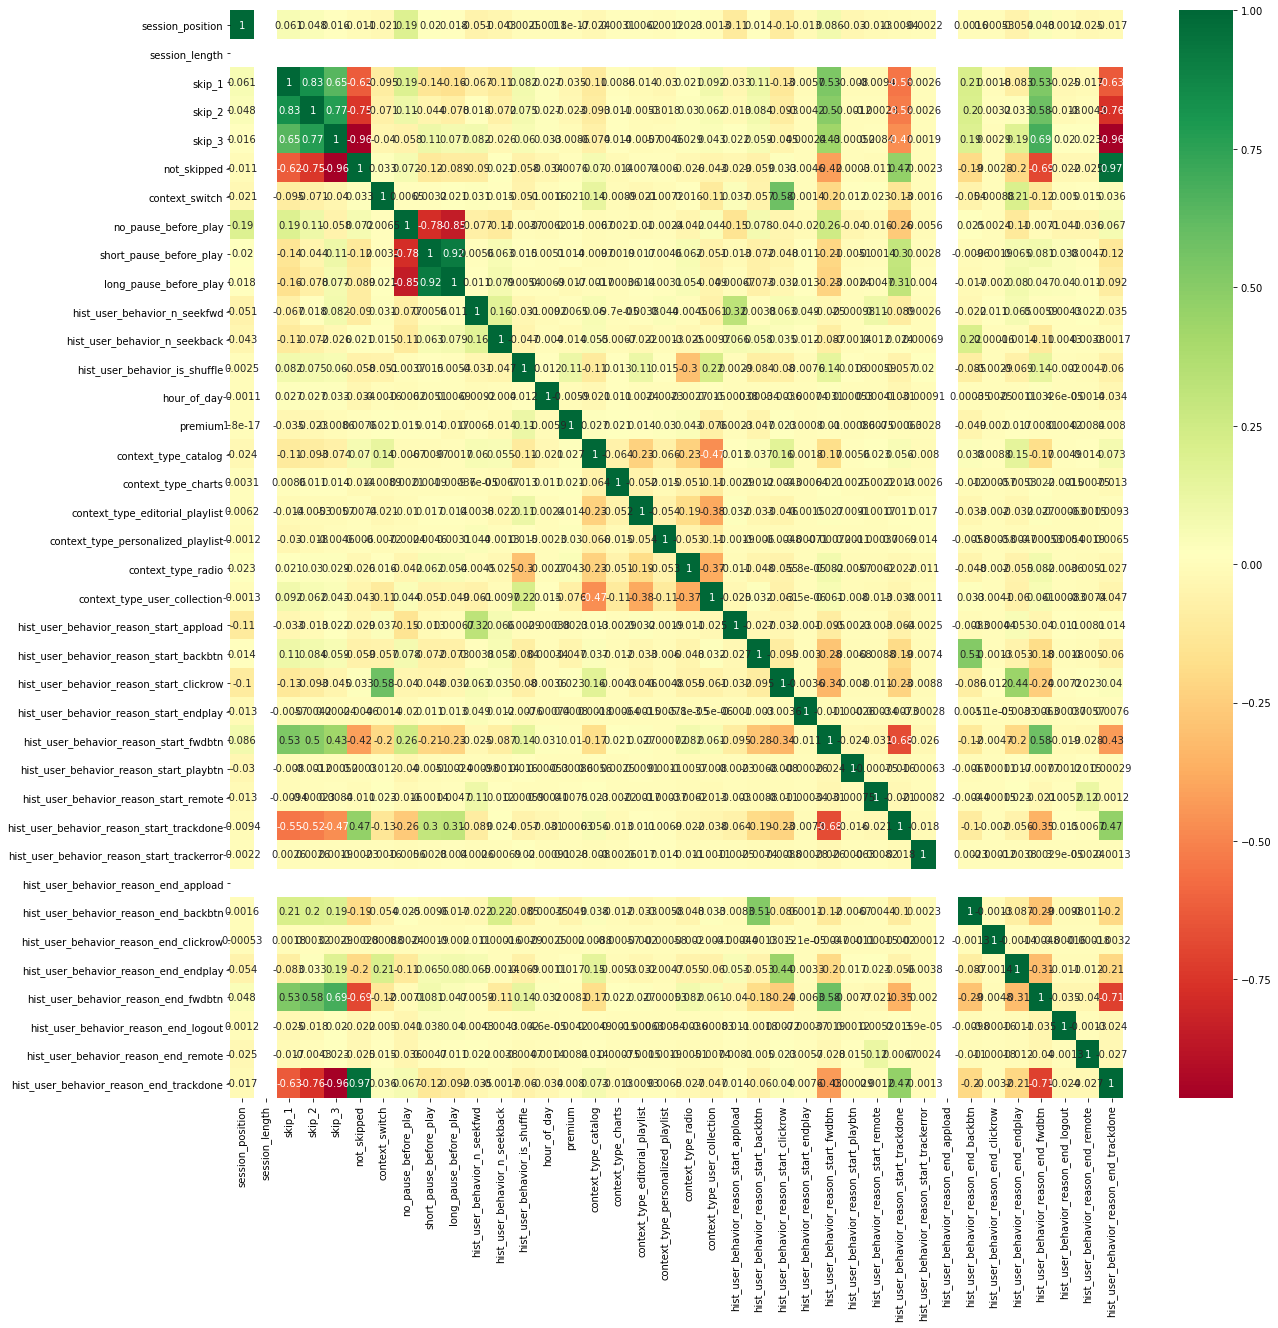

In [7]:
rel=td.corr()
rel_feature= rel.index
plt.figure(figsize=(20,20))
sns.heatmap(td[rel_feature].corr(), fmt= '.2g',annot=True, cmap="RdYlGn")

# EXPLORATORY DATA ANALYSIS

## ACOUSTICNESS

IF the value varies above 0.66, it's considered as the music dominant tracks.

IF the value varies between 0.33-0.66, the tracks belongs to both music and lyrics dominant.

IF the value varies below 0.33, it's considered as the lyrics dominant tracks.

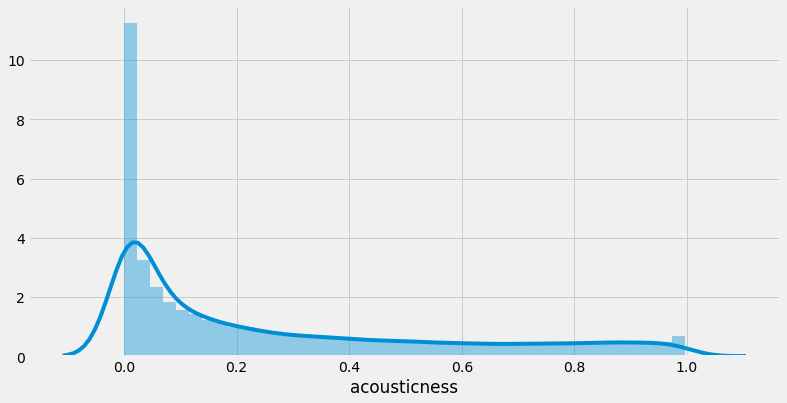

In [157]:
#TAKING THE FIRST 50,000 TRACKS FROM THE TRACK_FEATS DATASET FOR ANALYSIS
acoustic= tf.iloc[1:50000, 4]

plt.figure(figsize=(12,6))
sns.distplot(acoustic)

 ### INFERENCE
IT shows that majority of the songs are lyrics dominant tracks than music dominant tracks.

In [223]:
ac= acoustic[acoustic<0.33].value_counts().sum()
ac1= acoustic[acoustic>0.66].value_counts().sum()

acc= {"accoustic": ["Less_dominant","High_dominant"], "Values": [ac,ac1]}
acousticc= pd.DataFrame(acc, index=[0,1])

In [226]:
#PIE CHART REPRESENTATION
px.pie(data_frame= acousticc, names= ['Less_dominant','High_dominant'], values= acousticc["Values"], 
                   title= "PROPORTIONS OF THE ACOUSTICNESS", hole= 0.15)

## DANCEABILITY
As the value is tending to 1, then the track is suitable for dance movements.

If it's tending to zero, then the song isn't meant to dance.

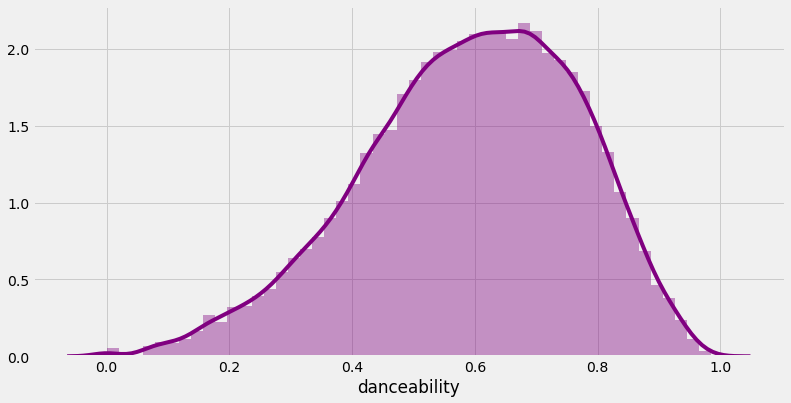

In [184]:
dance= tf.iloc[1:50000, 7]

plt.figure(figsize=(12,6))
sns.distplot(dance, color= "Purple")

In [231]:
dc= dance[dance<0.5].value_counts().sum()
dc1= dance[dance>0.5].value_counts().sum()

dcc= {"Danceability": ["Less_danceable","Highly_dancebale"], "Values": [dc,dc1]}
dancee= pd.DataFrame(dcc, index=[0,1])

In [235]:
#PIE CHART REPRESENTATION
px.pie(data_frame= dancee, names=["Less_danceable","Highly_dancebale"], values= dancee["Values"], 
                   title= "PROPORTIONS OF THE DANCEABILITY", hole= 0.15)

## POPULARITY

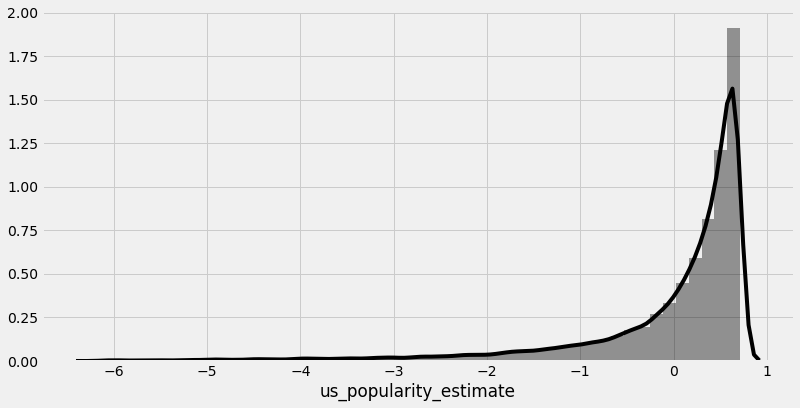

In [169]:
popularity= tf.iloc[1:50000, 3]

plt.figure(figsize=(12,6))
sns.distplot(popularity, color= "Black")

## VALENCE

The measurement of Valence gives as an idea about how positivity does the track conveys to the listeners.

Valence value ranges from 0 to 1.

As the value increase from 0 upto 1, conveying the positivity by the song also increases.

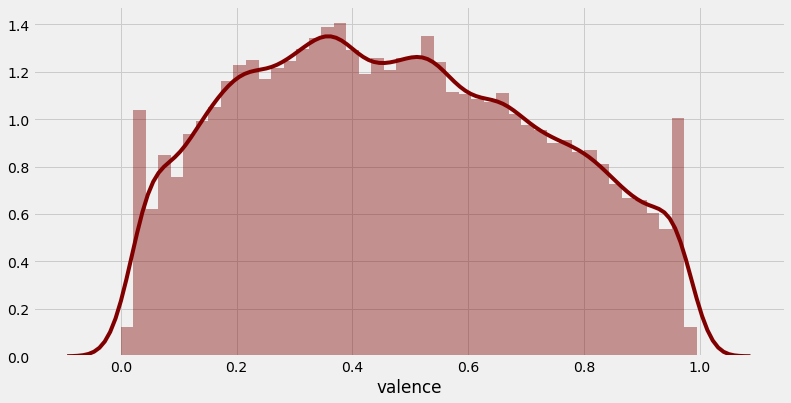

In [164]:
valence= tf.iloc[1:50000, 21]

plt.figure(figsize=(12,6))
sns.distplot(valence, color= "Maroon")

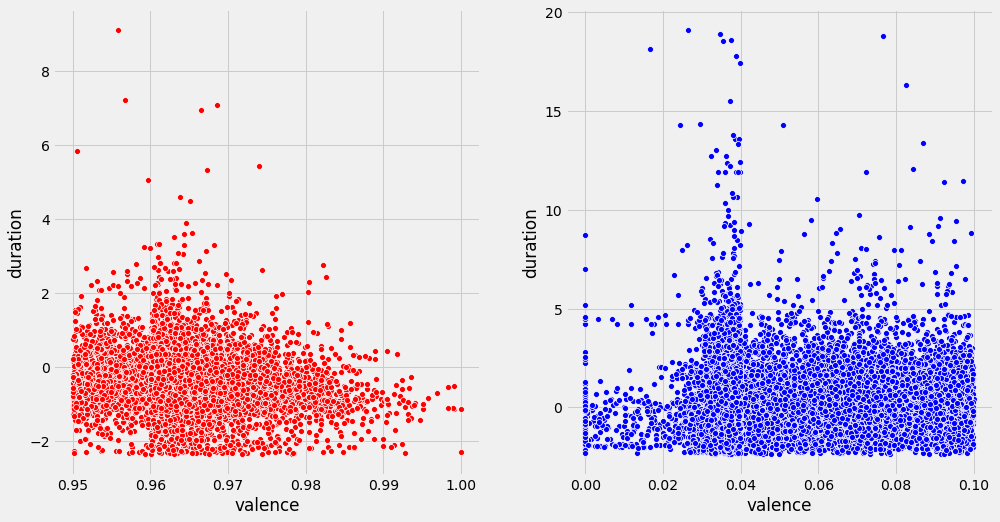

In [219]:
val_high= tf[tf["valence"]>0.95]
val_low=tf[tf["valence"]<0.1]

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.scatterplot(x= val_high["valence"], y=val_high["duration"], color= "Red")

plt.subplot(1,2,2)
sns.scatterplot(x= val_low["valence"], y=val_low["duration"], color= "Blue")

### The left scatter plot shows the list of first 50000 songs having extremely high valence

### The right scatter plot shows the list of songs having extremely low valence

## LOUDNESS

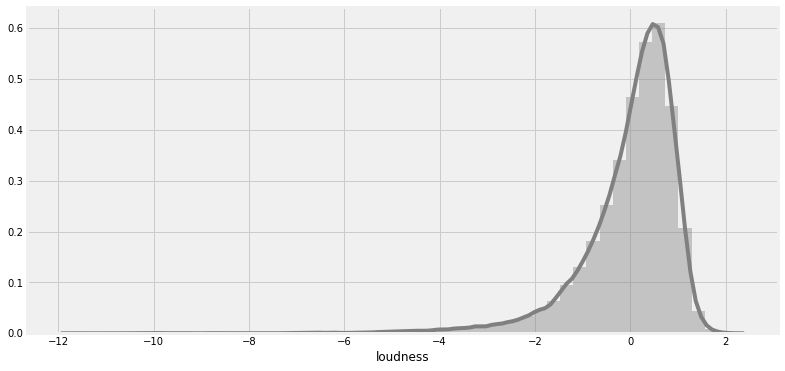

In [228]:
loudness= tf.iloc[1:50000, 14]

plt.figure(figsize=(12,6))
sns.distplot(loudness, color= "Grey")

## Creating the TARGET feature

### A new column "Skipped" will be added into the training dataset.

In [8]:
skipped=[]
for i in td["not_skipped"]:
    if (i==0):
        skipped.append(1)
    else:
        skipped.append(0)

In [9]:
td["skipped"]= pd.DataFrame(data= skipped)

In [10]:
td=td.drop("not_skipped", axis=1)

In [11]:
td.shape

(1181560, 40)

# Model Building using the TRAIN_DATA

In [12]:
#CREATING THE INPUT FEATURE
X=td.drop(["session_id", "track_id_clean","skipped"], axis=1)

#CREATING THE TARGET FEATURE
y=td["skipped"]

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)

In [15]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
ypred=classifier.predict(x_test)

In [17]:
classifier.score(x_test, y_test)

0.993432411388334

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, ypred)

0.006567588611665933

# VALIDATION DATA

In [19]:
vd= pd.read_csv("C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\TECHNOCOLABS_INTERNSHIP\\val_data_20.csv")
vd.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.000000,1.0,t_0ecb0e5a-7ef9-41d0-b4a5-04227f26df91,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.052632,1.0,t_cfb7d0c1-6d2e-40d7-b88b-4257418e0e66,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.105263,1.0,t_7f13ebe6-7616-470a-a196-d7054eb16941,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.157895,1.0,t_4e830a5d-4bd2-4d99-a780-2ad244e5e185,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,63_000ddeb6-1f90-495f-abec-dd3e9b0142bd,0.210526,1.0,t_3976726e-f7bd-4bb1-b554-78f205cc297b,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [20]:
#Creating the target feature
skipped=[]
for i in vd["not_skipped"]:
    if (i==0):
        skipped.append(1)
    else:
        skipped.append(0)

In [21]:
vd["skipped"]= pd.DataFrame(data= skipped)

In [22]:
vd=vd.drop("not_skipped", axis=1)

In [23]:
xv=vd.drop(["session_id", "track_id_clean","skipped"], axis=1)
yv=vd["skipped"]

In [24]:
from sklearn.model_selection import train_test_split
x_train_val, x_test_val, y_train_val, y_test_val = train_test_split(xv, yv, test_size=0.2, random_state=0)

In [25]:
classifier.fit(x_train_val, y_train_val)

DecisionTreeClassifier(random_state=0)

In [26]:
ypred2=classifier.predict(x_test_val)

In [27]:
classifier.score(x_test_val, y_test_val)

0.9914643905041345

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_val, ypred2)

0.008535609495865563

# Test data

In [29]:
test_data= pd.read_csv("C:\\Users\\anish\\Documents\\DATA_SCIENCE_JUPYTER\\TECHNOCOLABS_INTERNSHIP\\test_data_20.csv")
test_data.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,hist_user_behavior_reason_start_trackdone,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone
0,63_0018207a-324a-4309-9272-1f6e476f51b0,0.000000,1.0,t_bacf06d3-9185-4183-84ea-ff0db51475ce,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,63_0018207a-324a-4309-9272-1f6e476f51b0,0.052632,1.0,t_204562f8-e089-4305-be51-19913efdfbc6,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
2,63_0018207a-324a-4309-9272-1f6e476f51b0,0.105263,1.0,t_9a03f300-6504-4c7a-92b1-4cd88354ee74,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,63_0018207a-324a-4309-9272-1f6e476f51b0,0.157895,1.0,t_297efa33-b070-4e5d-bb42-111237295b6c,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,63_0018207a-324a-4309-9272-1f6e476f51b0,0.210526,1.0,t_8fd0c874-e115-4b75-8351-54acd7876edf,1,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [30]:
test_data.shape

(73960, 40)

In [31]:
#Creating the target feature
skipped=[]
for i in test_data["not_skipped"]:
    if (i==0):
        skipped.append(1)
    else:
        skipped.append(0)

In [32]:
test_data["skipped"]= pd.DataFrame(data= skipped)

In [33]:
test_data=test_data.drop("not_skipped", axis=1)

In [34]:
x=test_data.drop(["session_id", "track_id_clean","skipped"], axis=1)
Y=test_data["skipped"]

In [35]:
ypred1=classifier.predict(x)

In [36]:
classifier.score(x, Y)

0.991901027582477

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, ypred1)

array([[22781,   246],
       [  353, 50580]], dtype=int64)

In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y, ypred1)

0.008098972417522986

# MERGING TRACK FEATS AND TRAINING DATASETS

In [39]:
#Inorder to have a common column in both datasets for merging, I select "track_id", 
#but column name is different in training data, so I went to rename it
td=td.rename(columns={"track_id_clean": "track_id"})

In [40]:
td.head()

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,context_switch,no_pause_before_play,short_pause_before_play,...,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,skipped
0,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.000000,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.052632,1.0,t_1a73002a-d065-4a33-b98a-a3b0443310be,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.105263,1.0,t_16bc2816-8daf-449a-a0f7-93ee884ffdda,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.157895,1.0,t_71d34c2f-1c87-43df-83ba-00832e12194c,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,63_0000075d-50c4-4c13-b7d1-e91fdbce83bc,0.210526,1.0,t_a66ea088-b357-449a-8a1e-64dd0b8d6cb5,0,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1


In [41]:
train_data= td.copy()

In [42]:
track_feats= tf.copy()

### MERGING THE DATASETS

In [43]:
merged= pd.merge(track_feats, train_data, on=["track_id"])
merged.shape

(1181560, 69)

In [44]:
merged.set_index("track_id")

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,...,hist_user_behavior_reason_start_trackerror,hist_user_behavior_reason_end_appload,hist_user_behavior_reason_end_backbtn,hist_user_behavior_reason_end_clickrow,hist_user_behavior_reason_end_endplay,hist_user_behavior_reason_end_fwdbtn,hist_user_behavior_reason_end_logout,hist_user_behavior_reason_end_remote,hist_user_behavior_reason_end_trackdone,skipped
track_id,,,,,,,,,,,,,,,,,,,,,
t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,0.942687,...,0,0,0,0,0,1,0,0,0,1
t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,0.846197,...,0,0,1,0,0,0,0,0,0,1
t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,0.846197,...,0,0,0,0,0,1,0,0,0,1
t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,0.846197,...,0,0,1,0,0,0,0,0,0,1
t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,0.904784,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t_c1fbc23f-e577-4ea6-95e6-0f2f99013934,-0.513326,1.000000,0.689408,0.081950,0.620092,0.654756,0.819703,0.622234,0.629792,0.991706,...,0,0,0,0,1,0,0,0,0,1
t_c1fbc23f-e577-4ea6-95e6-0f2f99013934,-0.513326,1.000000,0.689408,0.081950,0.620092,0.654756,0.819703,0.622234,0.629792,0.991706,...,0,0,0,0,0,0,0,0,1,0
t_c1fbc23f-e577-4ea6-95e6-0f2f99013934,-0.513326,1.000000,0.689408,0.081950,0.620092,0.654756,0.819703,0.622234,0.629792,0.991706,...,0,0,0,0,0,1,0,0,0,1


### Saving the merged dataset as a "csv file"

In [ ]:
merged.to_csv("newdata.csv")

# Building the model using merged dataset

In [ ]:
X=merged.drop(["session_id","track_id","skipped"], axis=1)
y=merged["skipped"]

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)

In [49]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [50]:
ypred_merged= classifier.predict(x_test)

In [51]:
classifier.score(x_test, y_test)

0.9931023392802736

In [52]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, ypred_merged)

0.006897660719726463

## Introducing Principal Component Analysis
## Using Merged dataset

In [ ]:
#CREATING INPUT AND TARGET FEATURES
xm= merged.drop(["session_id","track_id", "skipped"], axis= 1)
ym= merged["skipped"]

In [54]:
from sklearn.decomposition import PCA
pca_merged= PCA(n_components=3)
principalcomponents_merged= pca_merged.fit_transform(xm)

In [55]:
prinicpal_merged= pd.DataFrame(data=principalcomponents_merged, columns= ["PC_1", "PC_2", "PC_3"] )

### Here's the resulting features after using PCA

In [56]:
prinicpal_merged.head()

,PC_1,PC_2,PC_3
0,2.599162,0.170294,-1.284672
1,2.758012,-0.220816,2.535269
2,2.757087,-0.278539,-0.355032
3,2.735534,-0.299078,-0.426492
4,2.843706,-0.107521,-0.026041


In [57]:
from sklearn.model_selection import train_test_split
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(prinicpal_merged, ym, test_size=0.2, random_state=0)

In [58]:
classifier.fit(x_train_m, y_train_m)

DecisionTreeClassifier(random_state=0)

In [59]:
ypred3=classifier.predict(x_test_m)

In [60]:
classifier.score(x_test_m, y_test_m) 

0.9158696976878026

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_m, ypred3)

0.08413030231219744

### THANK YOU